In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/csv-files-lhex/job_postings_fact.csv
/kaggle/input/csv-files-lhex/skills_dim.csv
/kaggle/input/csv-files-lhex/company_dim.csv


In [2]:
job_postings_df = pd.read_csv('/kaggle/input/csv-files-lhex/job_postings_fact.csv')
company_dim_df = pd.read_csv('/kaggle/input/csv-files-lhex/company_dim.csv')
skill_dim_df = pd.read_csv('/kaggle/input/csv-files-lhex/skills_dim.csv')

In [3]:
# Display the first few rows and columns of each DataFrame to understand their structure
job_postings_head = job_postings_df.head()
job_postings_head

,job_id,company_id,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg
0,0,0,Data Analyst,Marketing Data Analyst,Anywhere,via LinkedIn,Full-time,True,Serbia,2023-09-25 17:46:06,False,False,Serbia,NaN,NaN,NaN
1,55,1,Cloud Engineer,Storage and Virtualization Engineer,"Kuwait City, Kuwait",via Trabajo.org,Full-time,False,Kuwait,2023-07-30 17:49:18,True,False,Kuwait,NaN,NaN,NaN
2,66,2,Data Analyst,Data Analyst et Scientist F/H,"Paris, France",via Emplois Trabajo.org,Full-time,False,France,2023-07-28 17:28:01,False,False,France,NaN,NaN,NaN
3,76,3,Data Engineer,Data Engineer,"Denver, CO",via LinkedIn,Contractor,False,"Illinois, United States",2023-04-03 17:14:45,False,False,United States,hour,NaN,70.0
4,81,4,Data Engineer,Data Engineer,Anywhere,via LinkedIn,Contractor,True,Canada,2023-03-25 17:25:20,False,False,Canada,NaN,NaN,NaN


In [4]:
job_postings_columns = job_postings_df.columns.tolist()
job_postings_columns

['job_id',
 'company_id',
 'job_title_short',
 'job_title',
 'job_location',
 'job_via',
 'job_schedule_type',
 'job_work_from_home',
 'search_location',
 'job_posted_date',
 'job_no_degree_mention',
 'job_health_insurance',
 'job_country',
 'salary_rate',
 'salary_year_avg',
 'salary_hour_avg']

In [5]:
company_dim_head = company_dim_df.head()
company_dim_head

,company_id,name,link,link_google,thumbnail
0,0,Cryptology,NaN,https://www.google.com/search?sca_esv=56842508...,https://encrypted-tbn0.gstatic.com/images?q=tb...
1,1,Edraak,NaN,https://www.google.com/search?hl=en&gl=us&q=Ed...,https://encrypted-tbn0.gstatic.com/images?q=tb...
2,2,Groupe ADP,http://www.groupeadp.fr/,https://www.google.com/search?gl=us&hl=en&q=Gr...,https://encrypted-tbn0.gstatic.com/images?q=tb...
3,3,Interactive Resources - iR,NaN,https://www.google.com/search?q=Interactive+Re...,https://encrypted-tbn0.gstatic.com/images?q=tb...
4,4,Cybernetic Search,NaN,https://www.google.com/search?gl=us&hl=en&q=Cy...,https://encrypted-tbn0.gstatic.com/images?q=tb...


In [6]:
company_dim_columns = company_dim_df.columns.tolist()
company_dim_columns

['company_id', 'name', 'link', 'link_google', 'thumbnail']

In [7]:
company_dims_head = company_dim_df.head()
company_dims_columns = company_dim_df.columns.tolist()

In [8]:
company_dims_columns

['company_id', 'name', 'link', 'link_google', 'thumbnail']

In [9]:
company_dims_head

,company_id,name,link,link_google,thumbnail
0,0,Cryptology,NaN,https://www.google.com/search?sca_esv=56842508...,https://encrypted-tbn0.gstatic.com/images?q=tb...
1,1,Edraak,NaN,https://www.google.com/search?hl=en&gl=us&q=Ed...,https://encrypted-tbn0.gstatic.com/images?q=tb...
2,2,Groupe ADP,http://www.groupeadp.fr/,https://www.google.com/search?gl=us&hl=en&q=Gr...,https://encrypted-tbn0.gstatic.com/images?q=tb...
3,3,Interactive Resources - iR,NaN,https://www.google.com/search?q=Interactive+Re...,https://encrypted-tbn0.gstatic.com/images?q=tb...
4,4,Cybernetic Search,NaN,https://www.google.com/search?gl=us&hl=en&q=Cy...,https://encrypted-tbn0.gstatic.com/images?q=tb...


In [10]:
# Merge the job postings with company_dim and company_dims on company_id
merged_df = job_postings_df.merge(company_dim_df, on='company_id', how='left').merge(company_dim_df, on='company_id', how='left', suffixes=('_dim', '_dims'))
merged_df

,job_id,company_id,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,...,salary_year_avg,salary_hour_avg,name_dim,link_dim,link_google_dim,thumbnail_dim,name_dims,link_dims,link_google_dims,thumbnail_dims
0,0,0,Data Analyst,Marketing Data Analyst,Anywhere,via LinkedIn,Full-time,True,Serbia,2023-09-25 17:46:06,...,NaN,NaN,Cryptology,NaN,https://www.google.com/search?sca_esv=56842508...,https://encrypted-tbn0.gstatic.com/images?q=tb...,Cryptology,NaN,https://www.google.com/search?sca_esv=56842508...,https://encrypted-tbn0.gstatic.com/images?q=tb...
1,55,1,Cloud Engineer,Storage and Virtualization Engineer,"Kuwait City, Kuwait",via Trabajo.org,Full-time,False,Kuwait,2023-07-30 17:49:18,...,NaN,NaN,Edraak,NaN,https://www.google.com/search?hl=en&gl=us&q=Ed...,https://encrypted-tbn0.gstatic.com/images?q=tb...,Edraak,NaN,https://www.google.com/search?hl=en&gl=us&q=Ed...,https://encrypted-tbn0.gstatic.com/images?q=tb...
2,66,2,Data Analyst,Data Analyst et Scientist F/H,"Paris, France",via Emplois Trabajo.org,Full-time,False,France,2023-07-28 17:28:01,...,NaN,NaN,Groupe ADP,http://www.groupeadp.fr/,https://www.google.com/search?gl=us&hl=en&q=Gr...,https://encrypted-tbn0.gstatic.com/images?q=tb...,Groupe ADP,http://www.groupeadp.fr/,https://www.google.com/search?gl=us&hl=en&q=Gr...,https://encrypted-tbn0.gstatic.com/images?q=tb...
3,76,3,Data Engineer,Data Engineer,"Denver, CO",via LinkedIn,Contractor,False,"Illinois, United States",2023-04-03 17:14:45,...,NaN,70.0,Interactive Resources - iR,NaN,https://www.google.com/search?q=Interactive+Re...,https://encrypted-tbn0.gstatic.com/images?q=tb...,Interactive Resources - iR,NaN,https://www.google.com/search?q=Interactive+Re...,https://encrypted-tbn0.gstatic.com/images?q=tb...
4,81,4,Data Engineer,Data Engineer,Anywhere,via LinkedIn,Contractor,True,Canada,2023-03-25 17:25:20,...,NaN,NaN,Cybernetic Search,NaN,https://www.google.com/search?gl=us&hl=en&q=Cy...,https://encrypted-tbn0.gstatic.com/images?q=tb...,Cybernetic Search,NaN,https://www.google.com/search?gl=us&hl=en&q=Cy...,https://encrypted-tbn0.gstatic.com/images?q=tb...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787681,1146883,787681,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,...,NaN,NaN,Lendlease Corporation,http://www.lendlease.com/,NaN,https://encrypted-tbn0.gstatic.com/images?q=tb...,Lendlease Corporation,http://www.lendlease.com/,NaN,https://encrypted-tbn0.gstatic.com/images?q=tb...
787682,1300468,31237,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,...,NaN,NaN,HABA FAMILYGROUP,NaN,https://www.google.com/search?hl=en&gl=us&q=HA...,NaN,HABA FAMILYGROUP,NaN,https://www.google.com/search?hl=en&gl=us&q=HA...,NaN
787683,837368,948,Senior Data Engineer,Senior Data Engineer (m/w/d),"Düsseldorf, Jerman",melalui Monster.de,Pekerjaan tetap,False,Germany,2023-03-13 06:18:59,...,NaN,NaN,"CGI Group, Inc.",http://www.cgi.com/,https://www.google.com/search?ucbcb=1&hl=en&gl...,https://encrypted-tbn0.gstatic.com/images?q=tb...,"CGI Group, Inc.",http://www.cgi.com/,https://www.google.com/search?ucbcb=1&hl=en&gl...,https://encrypted-tbn0.gstatic.com/images?q=tb...
787684,1614901,948,Senior Data Engineer,(Senior) Data Engineer (m/w/d) - PUBLIC BW / C...,"Leinfelden-Echterdingen, Jerman",melalui Monster.de,Pekerjaan tetap,False,Germany,2023-03-13 06:18:59,...,NaN,NaN,"CGI Group, Inc.",http://www.cgi.com/,https://www.google.com/search?ucbcb=1&hl=en&gl...,https://encrypted-tbn0.gstatic.com/images?q=tb...,"CGI Group, Inc.",http://www.cgi.com/,https://www.google.com/search?ucbcb=1&hl=en&gl...,https://encrypted-tbn0.gstatic.com/images?q=tb...


In [11]:
#Analysis 1: Number of job postings per company
job_postings_per_company = merged_df['name_dim'].value_counts()

# Display the results of the analyses
print("Number of Job Postings per Company:")
job_postings_per_company.head()

Number of Job Postings per Company:


name_dim
Emprego                6661
Booz Allen Hamilton    2890
Dice                   2825
Harnham                2551
Insight Global         2254
Name: count, dtype: int64

In [12]:
#Analysis 2: Average salary by company (salary_year_avg)
average_salary_by_company = merged_df.groupby('name_dim')['salary_year_avg'].mean()
average_salary_by_company

name_dim
"Dbank"                                       NaN
"Hamkorbank" АТБ                              NaN
"KELKOO"                                      NaN
"PASHA Holding" LLC                           NaN
"TECHNICUS LTD" sp. z o.o. ODDZIAŁ W POLSCE   NaN
                                               ..
𝐏𝐓 𝐌𝐢𝐭𝐫𝐚 𝐏𝐢𝐧𝐚𝐬𝐭𝐡𝐢𝐤𝐚 𝐌𝐮𝐬𝐭𝐢𝐤𝐚 𝐑𝐞𝐧𝐭 (𝐌𝐏𝐌 𝐑𝐞𝐧𝐭)   NaN
🇮🇳 easyfix.in                                 NaN
🏛️WalletConnect                               NaN
💻 LGA IT                                      NaN
💾Data Trust Associates                        NaN
Name: salary_year_avg, Length: 140030, dtype: float64

In [13]:
# Analysis 3: Job distribution by location
job_distribution_by_location = merged_df['job_location'].value_counts()
job_distribution_by_location

job_location
Anywhere                               69606
Singapore                              23423
Paris, France                          12354
Bengaluru, Karnataka, India            11517
London, UK                             10578
                                       ...  
Dorchester, UK                             1
Germany   (+9 others)                      1
Planá nad Lužnicí, Czechia                 1
Edenton, NC                                1
Newark, New Jersey, Amerika Serikat        1
Name: count, Length: 17222, dtype: int64

In [14]:
# Check for missing salary data
print("Missing Salary Data:")
missing_salary_data = merged_df[['salary_year_avg', 'salary_hour_avg']].isnull().sum()
missing_salary_data

Missing Salary Data:


salary_year_avg    765652
salary_hour_avg    777021
dtype: int64

In [15]:
# Job distribution by job schedule type
job_distribution_by_schedule = merged_df['job_schedule_type'].value_counts()
job_distribution_by_schedule

job_schedule_type
Full-time                                703597
Contractor                                34827
Internship                                 8752
Part-time                                  7888
Full-time and Part-time                    6288
Full-time and Temp work                    2622
Full-time and Internship                   2336
Full-time and Contractor                   2291
Contractor and Temp work                   2281
Temp work                                  2157
Full-time, Part-time, and Internship        266
Part-time and Internship                    254
Temp work and Internship                    208
Full-time, Contractor, and Temp work        186
Full-time, Temp work, and Internship        175
Part-time and Contractor                    159
Full-time, Part-time, and Temp work         129
Full-time, Part-time, and Contractor        114
Part-time and Temp work                     111
Pekerjaan tetap                              58
Volunteer             

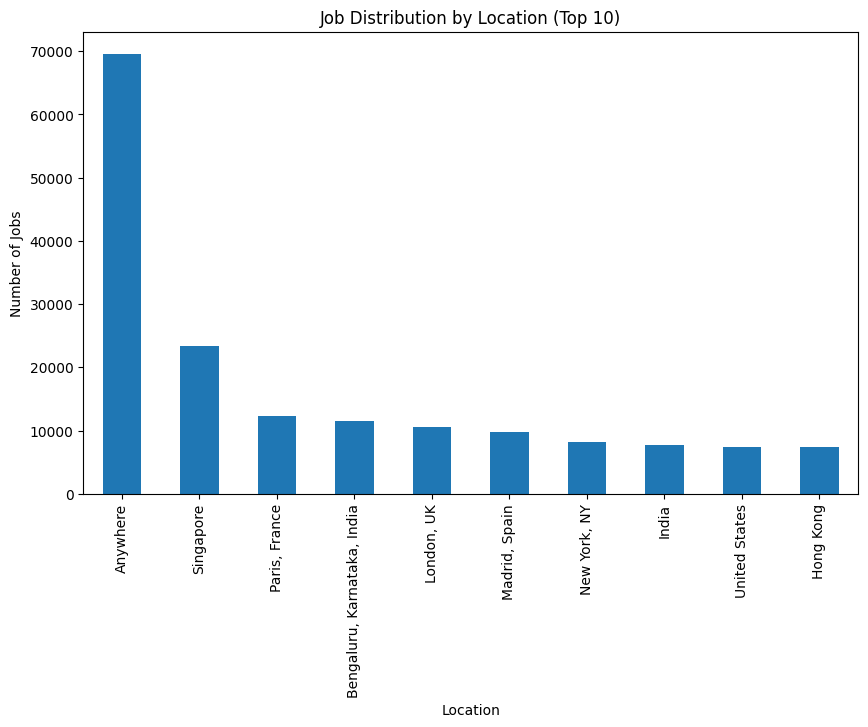

In [16]:
# Visualization: Job Distribution by Location
plt.figure(figsize=(10, 6))
job_distribution_by_location.head(10).plot(kind='bar')
plt.title('Job Distribution by Location (Top 10)')
plt.xlabel('Location')
plt.ylabel('Number of Jobs')
plt.show()

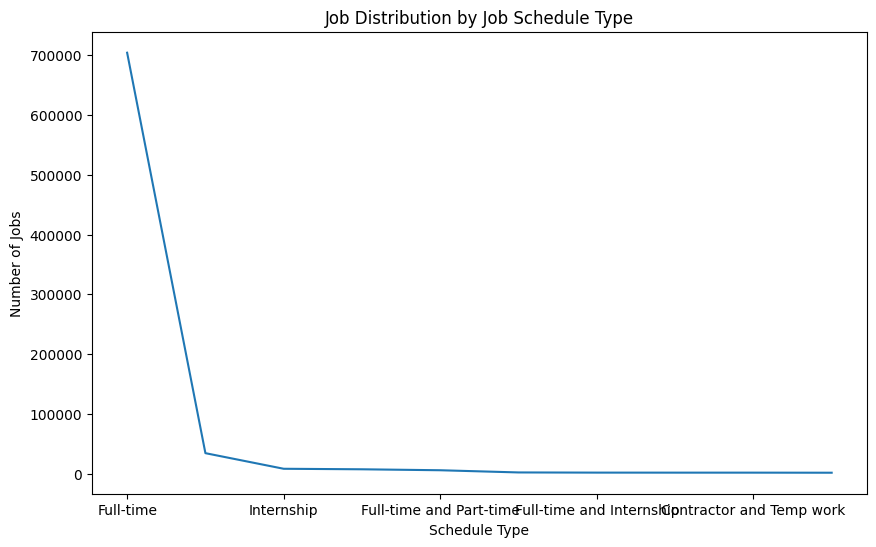

In [17]:
# Visualization: Job Distribution by Job Schedule Type
plt.figure(figsize=(10, 6))
job_distribution_by_schedule.head(10).plot(kind='line')
plt.title('Job Distribution by Job Schedule Type')
plt.xlabel('Schedule Type')
plt.ylabel('Number of Jobs')
plt.show()